<font size=10>**Mid-term Project**</font>

<font size=6>**Your AI Email Secretary**</font>

# **Business Problem - Automating Email Prioritization & Responses**



**Alex Carter**, a seasoned **Senior Manager in Software Development** at **Orion Tech Solutions**, plays a pivotal role in ensuring the smooth execution of multiple IT projects. Orion Tech Solutions, a **mid-sized IT services company**, prides itself on delivering cutting-edge software solutions to global clients, balancing innovation with operational efficiency.

With years of experience in software engineering and project management, Alex’s day is a mix of **strategic planning, problem-solving, and stakeholder coordination**. Managing a diverse portfolio of projects, Alex works closely with **internal teams, vendors, and clients**, ensuring deliverables meet expectations while navigating technical and organizational challenges.


**The Challenge**

A high-profile client has recently entrusted Orion Tech Solutions with the development of a **next-generation cloud security platform**. While the project holds immense potential for growth and recognition, it also brings **complexity, tight deadlines, and high stakeholder expectations**.

As the project nears critical milestones, Alex faces **multiple challenges:**

* Ensuring **timely delivery** while balancing **resource constraints**.
* Managing **escalations** related to security vulnerabilities discovered during testing.
* Communicating with **clients, vendors, and internal teams** to align expectations.
* Handling **unexpected system downtimes** due to scheduled IT maintenance.
* Addressing **compliance concerns** raised by the legal team on certain third-party integrations.

With multiple stakeholders relying on Alex’s leadership, **clear and effective communication** is essential. Every email, meeting, and decision made plays a role in determining the project's success.

### **The Case Study**
This case study explores the **real-world challenges** Alex encounters, highlighting how well-structured communication can help in:
1. **Crisis Management** – Handling security breaches and system outages.
2. **Client Relations** – Effectively communicating progress and addressing feedback.
3. **Team Coordination** – Ensuring alignment between development, security, and operations teams.
4. **Strategic Decision-Making** – Navigating legal, financial, and technical roadblocks.

Through **realistic scenarios and email exchanges**, we will examine how Alex can **leverage professional communication strategies** to tackle these challenges head-on, ensuring **project success and business continuity**.

### **Objective**

The goal of this project is to create a Generative AI-powered system that:
1. **Summarize** yesterday’s emails into actionable insights. [Yesterbox Approach]
2. **Prioritizes** emails based on urgency, sender, and context.
3. **Drafts** context-aware responses, reducing manual effort.



# **LLM Setup**



In [ ]:
!pip install -q openai==1.61.1

- The `config.json` file should contain **API_KEY** and **API Base URL** provided by OpenAI.
- You need to insert your actual API keys and endpoint URL obtained from your Olympus account. Refer to the **OpenAI Access Token documentation** for more information on how to generate and manage your API keys.
- This code reads the `config.json` file and extracts the API details.
  - The `API_KEY` is a **unique secret key** that authorizes your requests to OpenAI's API.
  - The `OPENAI_API_BASE` is the **API Base URL** where the model will process your requests.

**What To Do?**
- Use the sample `config.json` file provided.
- Add their **OpenAI API Key** and **Base URL** to the file.
- The `config.json` should look like this:

  ```
  {
        "API_KEY": "your_openai_api_key_here",
        "OPENAI_API_BASE": "https://aibe.mygreatlearning.com/openai/v1"
      }
  ```

In [ ]:
# @title Loading the `config.json` file
import json, os

# Load the JSON file and extract values
file_name = 'config.json'
with open(file_name, 'r') as file:
    config = json.load(file)
    os.environ['OPENAI_API_KEY']  = config.get("API_KEY") # Loading the API Key
    os.environ["OPENAI_BASE_URL"] = config.get("OPENAI_API_BASE") # Loading the API Base Url

In [ ]:
model_name = "gpt-4o-mini"

- The API key and base URL are stored in environment variables to avoid hardcoding sensitive information in the code.
- The `OpenAI()` object helps us interact with the model for prompt generation.


In [ ]:
from openai import OpenAI

# Initialize OpenAI client
client = OpenAI()

- This function helps **interact with the AI model** using two prompts:
  - **System Prompt:** Provides **background instructions** to the model on how to behave.
  - **User Prompt:** Contains the **user's query or task**.
- The `client.chat.completions.create()` method sends the request to the GPT model.
- The *temperature=0* setting ensures the response is **deterministic and consistent**.
- If any error occurs, the function will **print the error message**.


In [ ]:
# @title LLM function
# @markdown Once the API details are filled, the notebook will automatically load the configuration, and learners can generate model outputs using the llm() function.


def llm(system_prompt, user_prompt):
  try:
      # Craft the messages to pass to chat.completions.create
      prompt = [
          {'role':'system', 'content': system_prompt},
          {'role': 'user', 'content': user_prompt}
      ]

      response = client.chat.completions.create(
          model=model_name,
          messages=prompt,
          temperature=0
      )

      return response.choices[0].message.content.strip()

  except Exception as e:
      prediction = f'Sorry, I encountered the following error: \n {e}'
      print(prediction)

# **Data Setup**


### **Background**

**Name**: Alex Carter  
**Company**: Orion Tech Solutions (A mid-sized IT services company)  
**Role**: Senior Manager, Software Developement  

#### **About You**  
Alex oversees multiple projects related to software development and IT infrastructure. Your role involves coordinating with stakeholders, ensuring timely delivery, handling escalations, and approving critical project-related decisions. You work with internal teams, vendors, and clients, making communication a crucial part of your job.


**Objective:** Load the dataset containing email records and apply the Yesterbox approach to filter emails received on the previous day.

In [ ]:
# @title Step 1: Load the Dataset
# Data Loading

import pandas as pd
df = pd.read_csv("your_file_location", index_col="email_id", encoding='latin-1')      #Add the data file location
df


In [ ]:
# @title Step 2: Apply Yesterbox Filtering
# @markdown The Yesterbox approach involves processing emails from the previous day first before tackling today's emails.

# @markdown For this dataset, consider today's date as 4th March 2025.

# @markdown We filter the dataset to only include emails received on 3rd March 2025 (yesterday)
# (Yesterbox Approach)(Today: 4 march)



from datetime import datetime, timedelta

yesterday_date = pd.to_datetime("3/3/2025").strftime('%m/%d/%Y')

df['date_received'] = pd.to_datetime(df['date_received']).dt.strftime('%m/%d/%Y')

yesterday_emails = df[df['date_received'] == yesterday_date].reset_index(drop=True)
print(f"Filtered Emails Count: {len(yesterday_emails)}")


In [ ]:
df.shape

In [ ]:
# Here we see only 51 emails, as in 10 email had the date of 4th March 2025
yesterday_emails.info()

## **TASK - Categorization of emails**
Your task is to write the `system_prompt` & `user_prompt` for classifying all the emails into one of the below pre-defined categories.

1. **Urgent & High-Priority Emails**:
   - Emails that require immediate action and must be addressed today.
2. **Deadline-Driven Emails**:
   - Time-sensitive emails or meeting requests that need attention today.
3. **Routine Updates & Check-ins**:
   - Emails that require review and acknowledgment without immediate action.
4. **Non-Urgent Informational Emails**:
   - Emails that can be deferred or delegated to another time or person.
5. **Personal & Social Emails**:
   - Emails that can be reviewed optionally at a later time.
6. **Spam/Unimportant Emails**:
   - Emails that are not relevant and should be filtered out.


**Note:** Your response should include only one of the above six specified categories and nothing else.

```
Example Email : 'You Won a Free iPhone 15 Pro! ?? Click to Claim'
Expected Response : 'Spam/Unimportant Emails'

```




In [ ]:
# @title Code to add categories to the dataset
categories = ['Urgent & High-Priority Emails',
              'Deadline-Driven Emails',
              'Routine Updates & Check-ins',
              'Non-Urgent Informational Emails',
              'Personal & Social Emails',
              'Spam/Unimportant Emails']

In [ ]:
system_prompt = """

<-- YOUR SYSTEM PROMPT GOES HERE -->

"""

In [ ]:
user_prompt = f"""

<-- YOUR USER PROMPT GOES HERE -->

"""

In [ ]:
# @title Categorizing the emails
from tqdm import tqdm  # Import the tqdm library for the progress bar

# Ensure the 'category' column exists in the DataFrame
if 'category' not in yesterday_emails.columns:
  yesterday_emails['category'] = None  # Create the column if it does not exist


for index, row in tqdm(yesterday_emails.iterrows(), total=df.shape[0], desc='Processing emails'):
  prompt = f"""{user_prompt}
    Please find the attached email below from yesterday that need to be analyzed:
    ```
    {row.to_string()}
    ```
  """

  category_by_llm = llm(system_prompt, prompt)

  # Append the category generated by the LLM to the 'category' column in the same row
  if category_by_llm in categories:
    yesterday_emails.at[index, 'category'] = category_by_llm
  else:
    yesterday_emails.at[index, 'category'] = ""

In [ ]:
# Display the DataFrame which has categories
yesterday_emails.head()

# **Task 1: Awareness of your email: Get to know the detailed summary of your email received**


## **1A. Executive Dashboard (Top-Level Summary of Yesterday’s Inbox)**

**Note:** Follow the instructions carefully and complete the missing sections.

Alex’s inbox is a **delicate balance of urgent action items, strategic decisions, and routine updates**. He must **prioritize effectively**—focusing on high-impact emails first, ensuring compliance with deadlines, and delegating less critical tasks to his team.

In this step, you will generate a high-level summary of the emails received using the AI Email Secretary. The AI will categorize emails into distinct categories and generate actionable insights.

#### **TASK**
Write the `system_prompt` & `user_prompt` that will guide the AI model to generate an executive summary based on the filtered data (yesterday_emails). The prompt should:

1. Count the number of emails per category.

2. Provide a final AI summary that highlights the number of critical emails requiring immediate action and the emails which can be handled later.

In [ ]:
# @title System Prompt
# Write your system prompt here
system_prompt = """

<-- YOUR SYSTEM PROMPT GOES HERE -->

"""

In [ ]:
# @title User Prompt
# Write your user prompt here
user_prompt = f"""

<-- YOUR USER PROMPT GOES HERE -->


Below is the attached DataFrame for analysis:
```
{yesterday_emails.to_string()}
```
"""

In [ ]:
# @title  Calling the model and display the summary


response_1 = llm(system_prompt, user_prompt)        # llm is the model using gpt-4o-mini
response_1

from IPython.display import display, Markdown
display(Markdown(response_1))

<font color='blue' size="5">**Sample Output Example**</font>

A structured summary with the number of emails in each category and key action points.

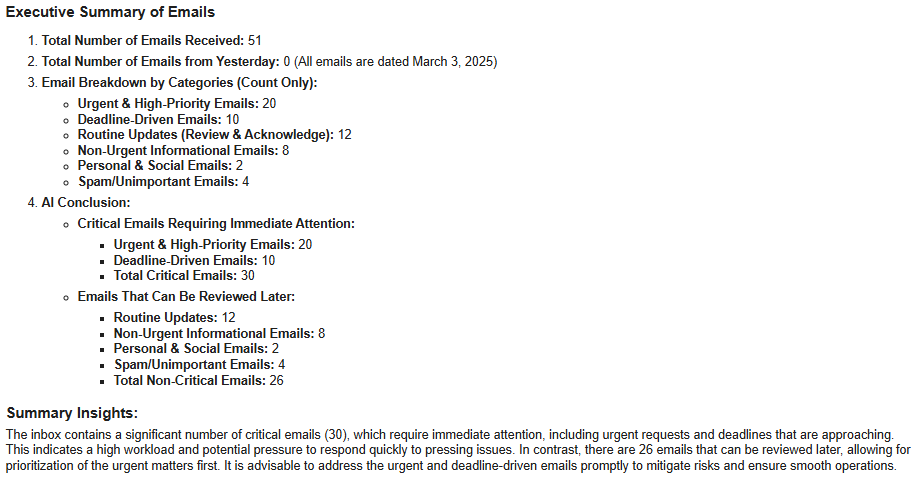

## **1B. Urgent Emails from Yesterday (🛑 Must-Do First Today)**

**Note:** Follow the instructions carefully and complete the missing sections.

**Urgent & High-Priority Emails (Requires Immediate Action)**

**Examples of Expected Outputs**

- **Subject:** URGENT: Critical System Downtime – Immediate Attention Required

  **Received:** 03/03/2025

  **Sender Name:** David Whitmore

  **Summary:** David reports a major outage with the Orion Analytics Dashboard, impacting multiple manufacturing lines.

  **Next Step:** Provide an immediate resolution or workaround by 12 PM EST today and escalate to the engineering team if necessary.

---

- **Subject:** URGENT: Medication Alerts Not Firing – This is Dangerous
  
  **Received:** 03/03/2025
  
  **Sender Name:** Rachel Thompson
  
  **Summary:** Rachel highlights a serious issue where automated medication alerts are not firing for ICU patients, posing a safety risk.
  
  **Next Step:** Join the emergency call and prioritize fixing the issue immediately.

---

- **Subject:** Approval Request: Travel Budget for AWS Summit 2025
  
  **Received:** 03/03/2025

  **Sender Name:** Olivia Chen
  
  **Summary:** Olivia requests approval for travel expenses for two team members to attend the AWS Summit 2025.
  
  **Next Step:** Review the request and confirm if you can proceed with the budget approval.

#### **TASK**
Write the `system_prompt` & `user_prompt` that will guide the AI to write a Summary and the Next Step to be taken for the respective email, for all urgent and high-priority emails from the filtered data (urgent_emails)

Ensure each email summary follows this format:
  - Subject:
  - Received:
  - Sender Name:
  - Summary:
  - Next Step: (it should be particular to that email)


**Note :-** Apply instructions regarding Yesterbox Rule : Confirm that these emails were received yesterday and are part of today's to-do list.

In [ ]:
# @title System Prompt

# Write your system prompt here
system_prompt = """

<-- YOUR SYSTEM PROMPT GOES HERE -->


"""

**Question:**
Construct the `user_prompt` that will pass the filtered dataset to the AI model for identifying urgent emails.

In [ ]:
# Filtering out the emails that are urgent and high-priority
urgent_emails = yesterday_emails[yesterday_emails['category'] == 'Urgent & High-Priority Emails']

In [ ]:
# @title User Prompt

# Write your user prompt here
user_prompt = f"""


<-- YOUR USER PROMPT GOES HERE -->


Below is the attached DataFrame, which contains all the emails that needs to be summarized:
```
{urgent_emails.to_string()}
```
"""

In [ ]:
# @title  Calling the model and display the summary

response_2 = llm(system_prompt, user_prompt)

from IPython.display import display, Markdown
display(Markdown(response_2))

<font color='blue' size="5">**Sample Output Example**</font>

A list of urgent emails with detailed summaries and next steps.

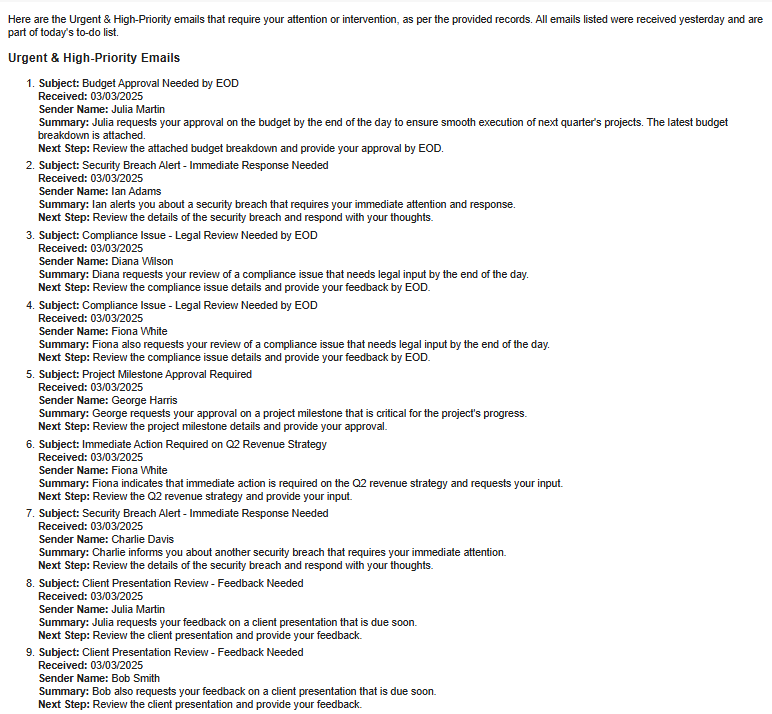

## **1C: Deadline-Driven Emails from Yesterday (⚡ Needs Attention Today)**

**Note:** Follow the instructions carefully and complete the missing sections.

**Deadline-Driven Emails (Needs to be Addressed Today)**

**Examples**

- **Subject: Q2 Revenue Strategy - Immediate Action Required**
  
  **From:** George Harris (Director of Strategy)
  
  *Summary:* Leadership expects a finalized strategy document by EOD to align with upcoming board discussions.

- **Subject: Client Presentation Review - Feedback Needed**
  
  **From:** George Harris (Senior Sales Executive)
  
  *Summary:* Feedback is required on a key client pitch deck before the presentation scheduled for tomorrow.

- **Subject: Employee Engagement Survey Reminder**
  
  **From**: Charlie Davis (HR Manager)
  
  *Summary:* Employees must complete the engagement survey before the end of the day to finalize workplace improvement initiatives.

### **TASK**
Write the `system_prompt` and `user_prompt` that will guide the AI model to summarize and generate an appropriate next step for time-sensitive and deadline-driven emails. The response should include the following information:

- **Subject**: (The email's subject line)
- **Received**: (The time and date the email was received)
- **Sender Name**: (Name of the person who sent the email)
- **Summary**: (A concise summary of the email's content)
- **Next Step**: (A specific action that needs to be taken based on the email, with a clear focus on meeting deadlines)

Each email must explicitly mention a **specific deadline** for today or require action to meet an impending delivery timeline.

The final count of Deadline-Driven emails with summary

**Question:**
Construct the `user_prompt` to pass the filtered dataset and request deadline-driven emails with next steps.

Ensure that:
  - These emails are separate from the Urgent & High-Priority Emails already covered.
  - **Exclude** any emails already categorized under **Urgent & High-Priority**.
  - Each email must mention a **specific deadline** for today or require action to meet a delivery timeline.
  - The final count of Deadline-Driven emails + Urgent & High-Priority emails should equal the Critical Emails count in the Executive Summary.

In [ ]:
# @title System Prompt

# Write your system prompt here
system_prompt = """

<-- YOUR SYSTEM PROMPT GOES HERE -->

"""


In [ ]:
# Filtering out the emails that are Time Sensitive & Deadline-Driven
deadline_emails = yesterday_emails[yesterday_emails['category'] == 'Deadline-Driven Emails']

In [ ]:
# @title User Prompt


# Write your user prompt here
user_prompt = f"""

<-- YOUR USER PROMPT GOES HERE -->


Below is the attached DataFrame, which contains all the emails that needs to be summarized:
```
{deadline_emails.to_string()}
```
"""

In [ ]:
# @title  Calling the model and display the summary

response_3 = llm(system_prompt, user_prompt)

from IPython.display import display, Markdown
display(Markdown(response_3))


<font color='blue' size="5">**Sample Output Example**</font>


A list of deadline-driven emails with summaries and next steps.

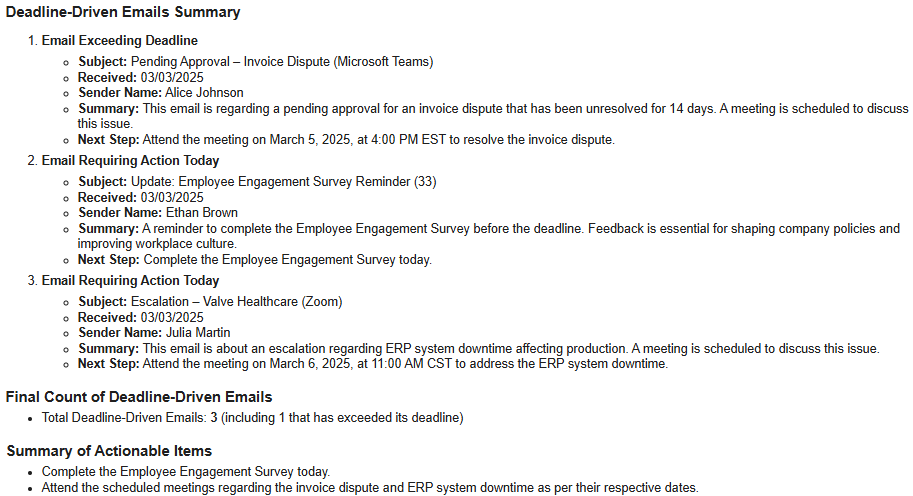

# **Task 2: AI-Generated "First Response" Drafts for Critical Email**

**Note:** Follow the instructions carefully and complete the missing sections.

####  <font color="red"> **Critical Emails** </font> are combination of the <font color="red"> **Urgent & High-Priority Emails + Deadline-Driven Emails**</font>

**Objective:** Generate AI-drafted responses for critical emails received yesterday.


#### **TASK**
Write the `system_prompt` & `user_prompt` that will guide the AI model to generate a professional "First Response Draft" for the High Priority Emails.

The response should include:
  - Acknowledge the sender’s request and contextually relevant.
  - Address the key points, queries, or actions requested in the original email.
  - Provide a clear next step or decision.
  - Maintain a polite, formal, and professional tone, aligned with corporate communication standards.
---
The format of the Draft should have:
- Subject: (Subject of the email)
- Sender Name: (Name of the Sender)
- AI Drafted Reply: (Your AI-generated response)

In [ ]:
# @title System Prompt
# Write your system prompt here
system_prompt = """

<-- YOUR SYSTEM PROMPT GOES HERE -->

"""


In [ ]:
# Filtering out the emails that are Critical Emails, i.e. ('Urgent & High-Priority Emails' + 'Deadline-Driven Emails')
critical_emails = yesterday_emails[yesterday_emails['category'].isin(['Urgent & High-Priority Emails', 'Deadline-Driven Emails'])]

In [ ]:
# @title User Prompt

# You may format the classifying method according to you


# Write your user prompt here
user_prompt = f"""

<-- YOUR USER PROMPT GOES HERE -->



Below is the attached DataFrame, which contains all the critical emails that needs to be replied:
```
{critical_emails.to_string()}
```
"""

In [ ]:
# @title  Calling the model and display the summary

response_4 = llm(system_prompt, user_prompt)
from IPython.display import display, Markdown
display(Markdown(response_4))

<font color='blue' size="5">**Sample Output Example**</font>

A list of AI-drafted resoponses for the critical emails received yesterday with detailed summaries and next steps.

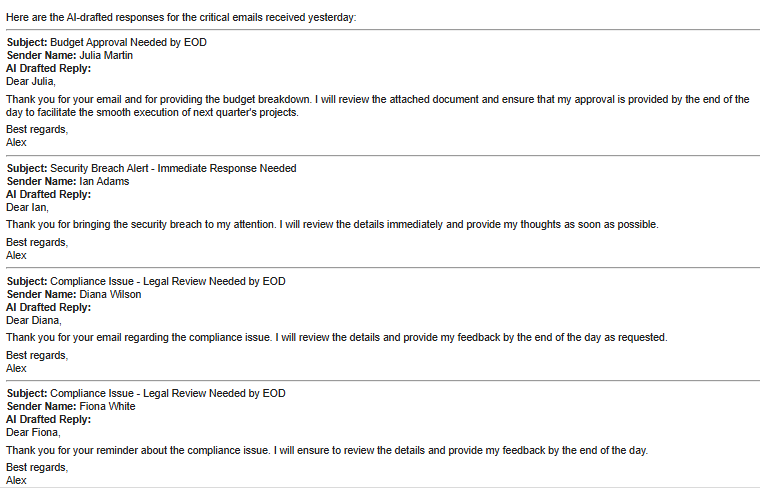

# **Task 3: Evaluation**

**Note:** Follow the instructions carefully and complete the missing sections.

## **Evaluation of Prompt Outputs with LLM-as-a-Judge**

**1. Introduction**

Evaluating the quality of prompts using LLM-as-a-Judge involves leveraging a more advanced Language Model (LLM) to assess the quality, correctness, and effectiveness of responses generated by another LLM or the same model. This method provides automated, consistent, and scalable qualitative and quantitative evaluations.

The evaluation process will:

- Use LLM-as-a-Judge to rate prompt outputs on predefined criteria.

- Automate scoring and feedback generation.

- Provide insights for prompt refinement.

Large Language Models (LLMs) can be used not only to generate content but also to **evaluate** the quality of generated responses.


### **2. Evaluation Criteria**

We will evaluate the prompt outputs based on the following key dimensions:

Rate the given **summary** on a scale of 1 to 5 for the following criteria:

- **Relevance**: How well does the **summary** address the input query or task? Identify the key information that is captured or missed. Provide a score from 1 to 5 along with Justification
- **Clarity**: How clear and understandable is the **summary**? Highlight any confusing or ambiguous phrases. Provide a score from 1 to 5 along with Justification
- **Actionability**: Does the **summary** provide clear next steps or actionable information? Provide a score from 1 to 5 along with Justification

Additionally, the LLM will be asked to provide insights in the following areas:

- **Strengths**: Highlight the key strengths of the summary.
- **Improvements**: Suggest 1-2 areas for improvement.
- **Overall Justification**: Provide a 2-3 line summary evaluation, including key observations.

#### **TASK**
Your task is to write the `system_prompt` & `user_prompt` for the above mentioned 6 criteria also note to extarct the response strictly in **JSON format**

```
Eg.Provide your evaluation strictly in JSON format:

{
  "Relevance": {"score": "", "justification": ""},
  "Clarity": {"score": "", "justification": ""},
  "Actionability": {"score": "", "justification": ""},
  "Strengths": "",
  "Improvements": "",
  "Overall_Justification": ""
}

```



In [ ]:
# @title Evaluation System Prompt

eval_system_prompt = """

<-- YOUR SYSTEM PROMPT GOES HERE -->

"""

In [ ]:
# @title Evaluation User Prompt

eval_user_prompt = f"""

  <-- YOUR USER PROMPT GOES HERE -->


"""

In [ ]:
# @title Evaluation Function & User Prompt

def evaluate_summary(eval_system_prompt, eval_user_prompt, summary, eval_model="gpt-4o-mini"):
    try:

        modified_prompt = f""" {eval_user_prompt}
                          Here is the summary:
                          ```
                          {summary}
                          ```
                          """

        eval_response = client.chat.completions.create(
            model=eval_model,
            messages=[
                {"role": "system", "content": eval_system_prompt},
                {"role": "user", "content": modified_prompt}
            ],
            temperature=0
        )
        return eval_response.choices[0].message.content.strip()

    except Exception as e:
        print(f"Error evaluating prompt: {e}")
        return "{}"  # Return empty JSON structure on error

In [ ]:
responses = response_4.split("---")            # splitting response on the basis of delimiter, so we get each response for the email indivisually
for _ in responses[1:-1]:                      # Excluding First and Last Element as they are nothing but blanks .i.e. (' ')
  display(Markdown(_))
  print("+"*100)

In [ ]:
# @title Evaluation for Each Generated Response
evaluation_results = [evaluate_summary(eval_system_prompt, eval_user_prompt, summary) for summary in responses[1:-1]]        # Excluding first and last elements as they are not the actual emails and some LLM generated support texts

In [ ]:
display(Markdown(evaluation_results[0]))

In [ ]:
# @title Converting JSON Scores into DataFrame
import pandas as pd
import json

scores = []
justifications = []
strengths = []
improvements = []


for result in evaluation_results:
    try:
        result_dict = json.loads(result)
        score_dict = {k: v.get("score", "NA") for k, v in result_dict.items() if isinstance(v, dict) and "score" in v}
        justification = result_dict.get("Overall_Justification", "NA")
        strength = result_dict.get("Strengths", "NA")
        improvement = result_dict.get("Improvements", "NA")

        # Append Results
        scores.append(score_dict)
        justifications.append(justification)
        strengths.append(strength)
        improvements.append(improvement)

    except (json.JSONDecodeError, KeyError, TypeError):
        scores.append({"Relevance": None, "Clarity": None, "Conciseness": None, "Coherence": None, "Actionability": None})
        justifications.append("")
        strengths.append("")
        improvements.append("")

In [ ]:
# @title Creating Final Evaluation DataFrame
pd.set_option('max_colwidth', 0)
df_scores = pd.DataFrame(scores)
df_scores["Strengths"] = strengths
df_scores["Improvements"] = improvements
df_scores["Justification"] = justifications

In [ ]:
# @title Display Final Evaluation Table
df_scores

<font color='blue' size="5">**Sample Output Example**</font>


Scores and explanation for the `response_4` which is the AI generated responses.

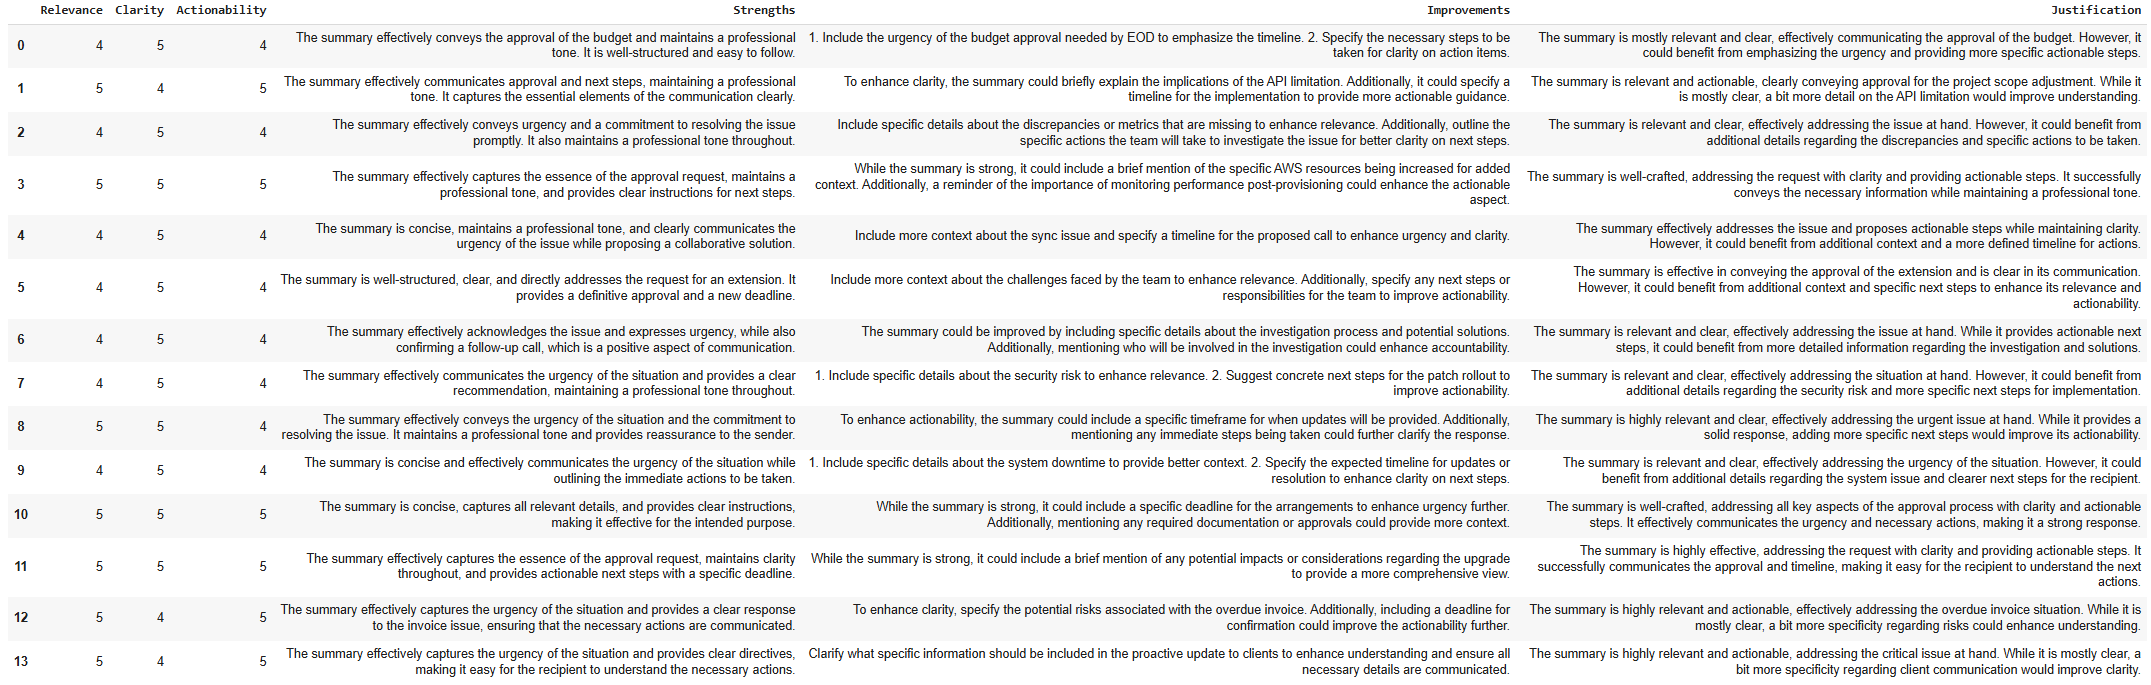

# **Task 4: Summary and Recommendation**

**Note:** Follow the instructions carefully and complete the missing sections.

In this task, you will write a **Summary and Recommendation** for the generated customer review response based on your understanding.

**Instructions:**

In this section, summarize the overall performance of the generated email summary across all tasks.

**1. Summary of Observations:**

* Briefly describe how the AI Email Secretary performed in summarizing emails.
* Highlight any patterns observed in the summaries (e.g., accuracy, level of detail, or any common errors).

**2. Evaluation Highlights:**

* Mention how the generated summaries performed on key dimensions:
  * Relevance: Did the summary capture the important points of the email?
  * Clarity: Was the summary easy to understand?
  * Actionability: Did the summary convey any next steps or actions required?

**3. Strengths:**

* List 2-3 strengths of the generated summaries (e.g., good at capturing action points, concise representation).

**4. Improvement Areas:**

* Suggest 1-2 areas where the AI Email Secretary can improve (e.g., missing certain details, inconsistent language).

**5. Final Recommendation:**

* Conclude with a recommendation on whether the current performance meets user needs or if further improvements are needed.

`<Enter your summary here>`

<font color='blue' size="5">**Sample Output Example**</font>

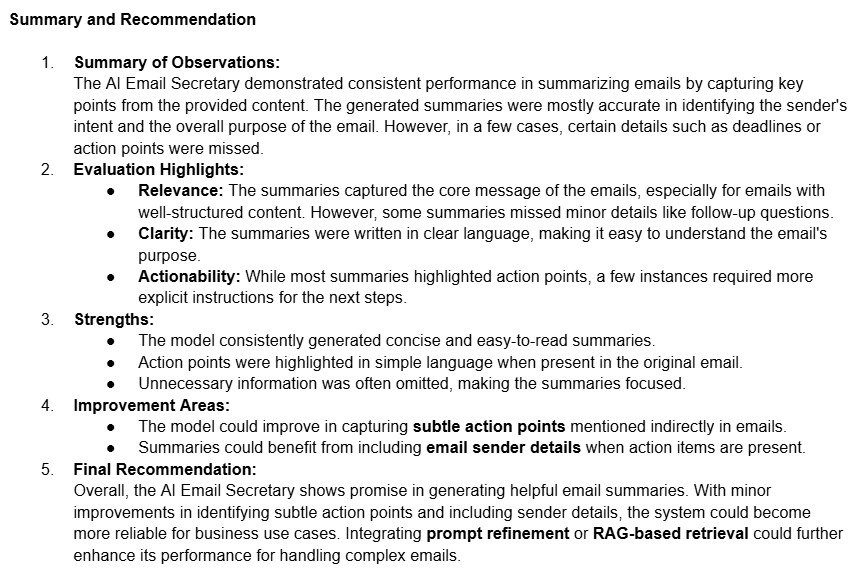

**Final Summary of Your AI Email Secretary’s Morning Report**

Every morning, you should see:

    ✔️ A structured breakdown of yesterday’s emails

    ✔️ Prioritized urgent & deadline-driven emails

    ✔️ Summarized updates & informational emails

    ✔️ AI-drafted responses to high-priority emails
